KMEANS

* Partition of data into various clusters and minimizing the variance within cluster
* k different clusters formed have different groups formed, provided each having group has unique features from other 

Ways to choose cluster

* elbow method - visually its graph looks like human arm nd elbow gives
optimal no. of clusters (choose optimal k) 
* purpose based - cluster based on need k varies (more variety more clusters)

                                         STEPS
* TAKING CENTROIDS(Center of a cluster (e.g., in K-Means).)
* DISTANCE EVALUATION FROM THE CLUSTER CENTROIDS(Inertia) ND FORMING CLUSTERS
* MOVING OF CENTROIDS BASED ON minimum DISTANCE FOR OPTIMIZATION
* OPTIMIZE THE CLUSTERS (once the intra-cluster distance is minimized nd they become static)
* CONVERGENCE (distinctive different btw clusters)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = r"C:\Users\bianc\Downloads\Mall_Customers.csv"
df = pd.read_csv(data)

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
df.shape

(200, 5)

In [18]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [20]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
df.drop(["CustomerID"], axis = 1, inplace = True)

In [23]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


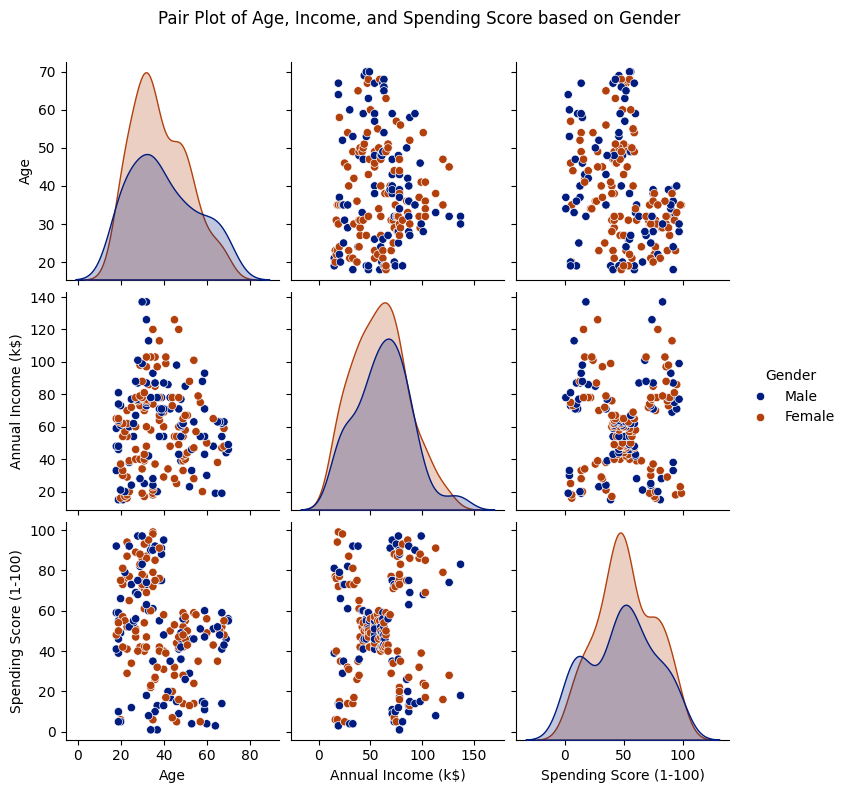

In [41]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue = "Gender",palette  = "dark")
plt.suptitle("Pair Plot of Age, Income, and Spending Score based on Gender", y = 1.05)
plt.show()

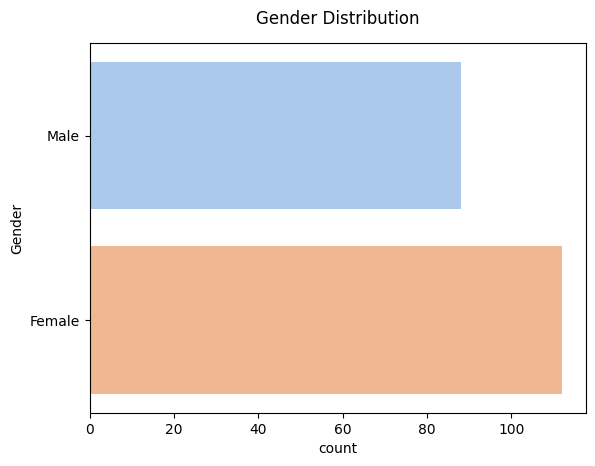

In [55]:
sns.countplot(data = df, y = "Gender", hue = "Gender", palette = "pastel")
plt.title("Gender Distribution", y = 1.03)
plt.show()

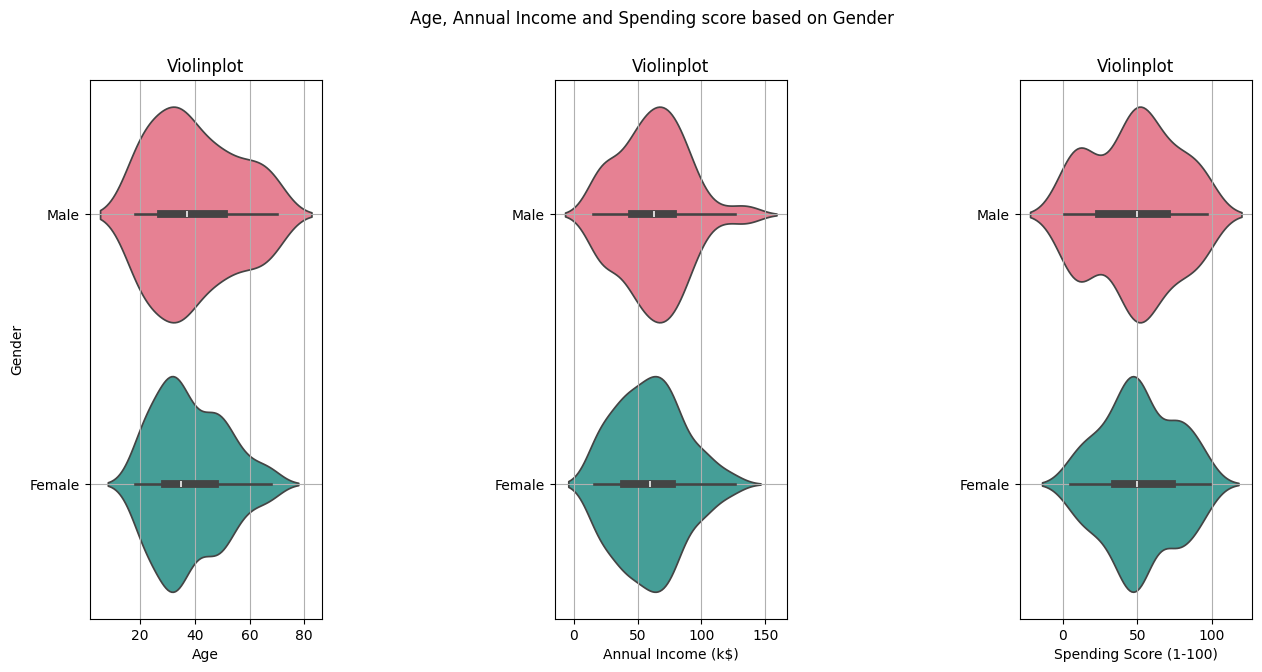

In [80]:
plt.figure(figsize = (15,7))
n = 0 
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 1, wspace = 1)
    sns.violinplot(x = cols, y = 'Gender', hue = 'Gender' , data = df, palette  = 'husl', legend= False)
    plt.ylabel('Gender' if n == 1 else '')
    plt.suptitle("Age, Annual Income and Spending score based on Gender")
    plt.title("Violinplot", y = 1)
    plt.grid(True)
plt.show()


In [106]:

    age_ranges = {
    'age_18_to_25' : df[(df['Age'] >= 18) & (df['Age'] <= 25)],
    'age_26_to_30' : df[(df['Age'] >= 26) & (df['Age'] <= 30)],
    'age_31_to_40' : df[(df['Age'] >= 31) & (df['Age'] <= 40)],
    'age_42_to_50' : df[(df['Age'] >= 41) & (df['Age'] <= 50)],
    'age_above_50' : [df['Age'] >= 50]}

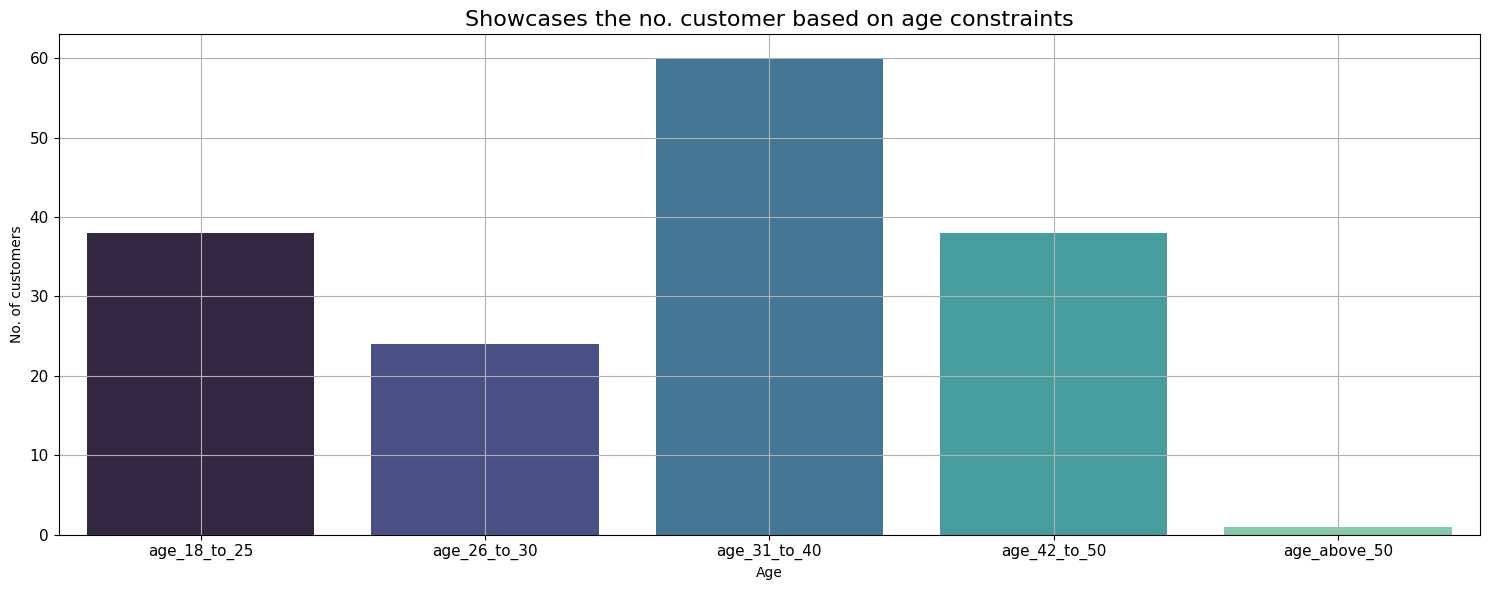

In [108]:
agex = list(age_ranges.keys())
agey = [len(age) for age in age_ranges.values()]
plt.figure(figsize = (15,6))
plt.title("Showcases the no. customer based on age constraints", fontsize = 16)
plt.xlabel("Age")
plt.ylabel("No. of customers")

sns.barplot(x = agex, y = agey, palette = "mako", hue = agex)
plt.grid(True)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.tight_layout()
plt.show()



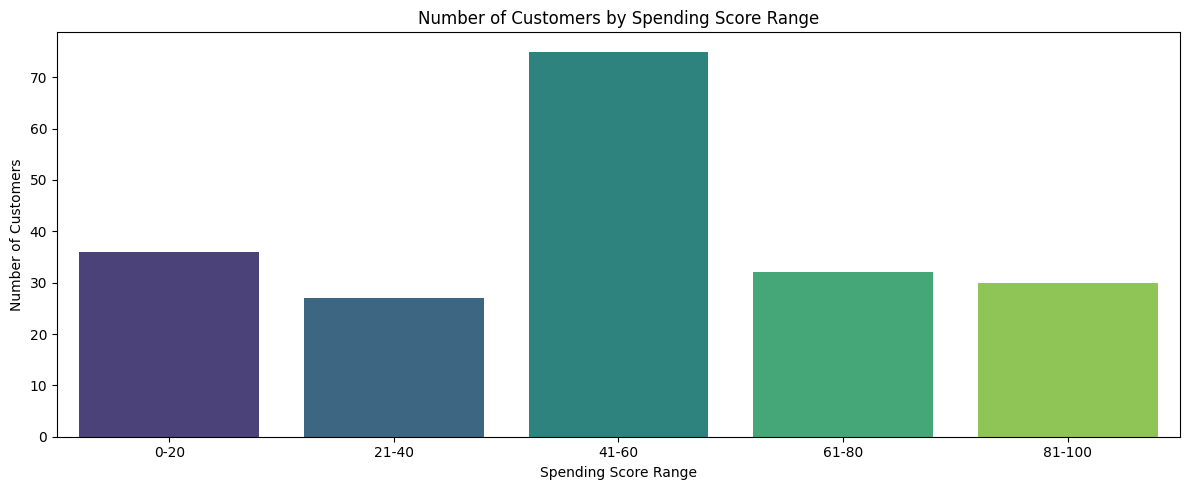

In [109]:
spending_ranges = {
    '0-20': df[(df['Spending Score (1-100)'] >= 0) & (df['Spending Score (1-100)'] <= 20)],
    '21-40': df[(df['Spending Score (1-100)'] > 20) & (df['Spending Score (1-100)'] <= 40)],
    '41-60': df[(df['Spending Score (1-100)'] > 40) & (df['Spending Score (1-100)'] <= 60)],
    '61-80': df[(df['Spending Score (1-100)'] > 60) & (df['Spending Score (1-100)'] <= 80)],
    '81-100': df[(df['Spending Score (1-100)'] > 80) & (df['Spending Score (1-100)'] <= 100)],
}

spending_x = list(spending_ranges.keys())
spending_y = [len(group) for group in spending_ranges.values()]

# Plot for Spending Score
plt.figure(figsize=(12, 5))
sns.barplot(x=spending_x, y=spending_y, palette="viridis", hue = spending_x)
plt.title("Number of Customers by Spending Score Range")
plt.xlabel("Spending Score Range")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

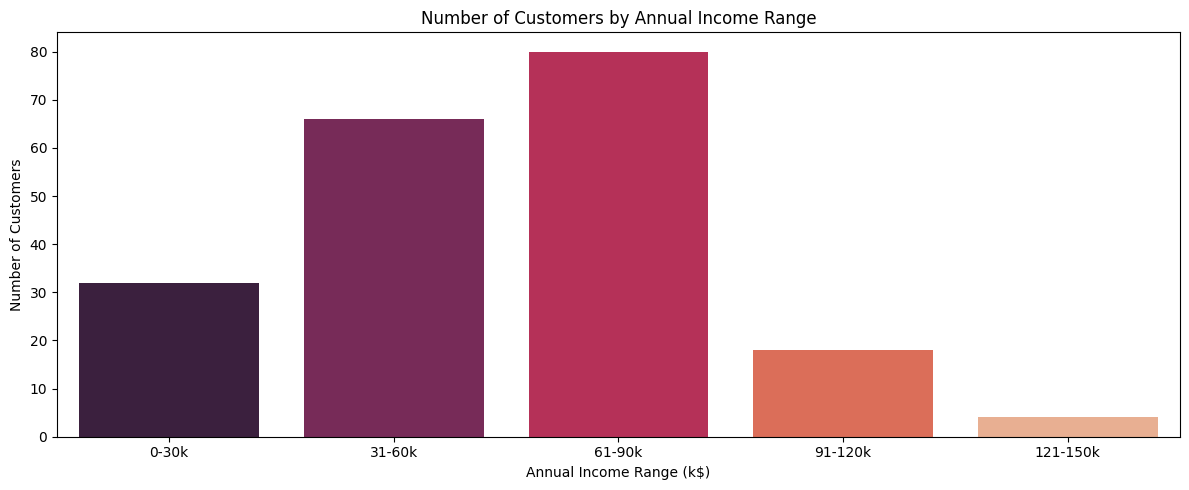

In [110]:
income_ranges = {
    '0-30k': df[(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)],
    '31-60k': df[(df['Annual Income (k$)'] > 30) & (df['Annual Income (k$)'] <= 60)],
    '61-90k': df[(df['Annual Income (k$)'] > 60) & (df['Annual Income (k$)'] <= 90)],
    '91-120k': df[(df['Annual Income (k$)'] > 90) & (df['Annual Income (k$)'] <= 120)],
    '121-150k': df[(df['Annual Income (k$)'] > 120) & (df['Annual Income (k$)'] <= 150)],
}

income_x = list(income_ranges.keys())
income_y = [len(group) for group in income_ranges.values()]


plt.figure(figsize=(12, 5))
sns.barplot(x=income_x, y=income_y, palette="rocket", hue = income_x)
plt.title("Number of Customers by Annual Income Range")
plt.xlabel("Annual Income Range (k$)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


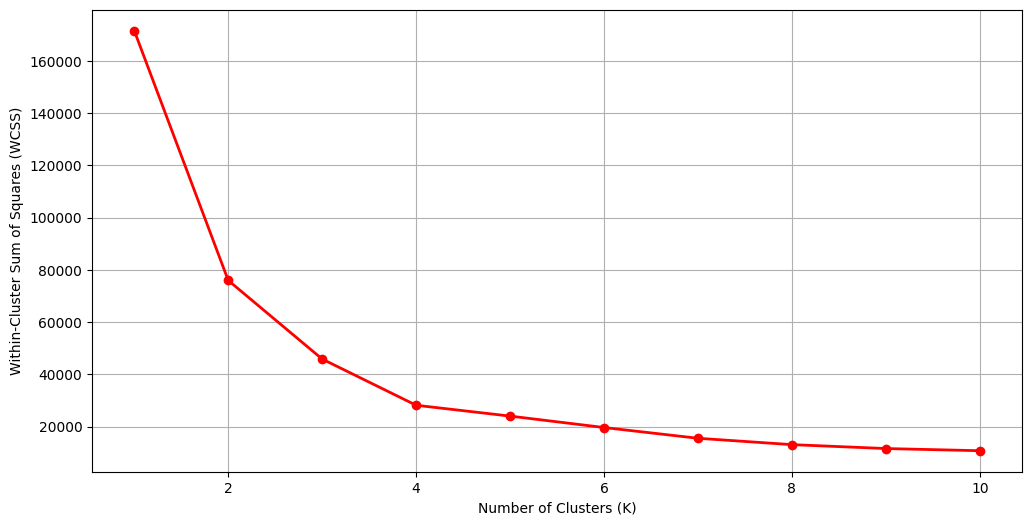

In [183]:
X1 = df.loc[:,["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters= k, init = "k-means++",random_state=0)
    model = kmeans.fit(X1)
    wcss.append(kmeans.inertia_)  #inertia_ evaluates the squared distance between the points and 
    #their associated centroids
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth = 2, color = "red", marker = "o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.show()

In [184]:
model

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [185]:
#Number of clusters that we are creating based on the above scatterplot of 
kmeans = KMeans(n_clusters=4, init = "k-means++" , random_state = 0)
labels = kmeans.fit_predict(X1)
print(labels)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [186]:
center = kmeans.cluster_centers_
print(center)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


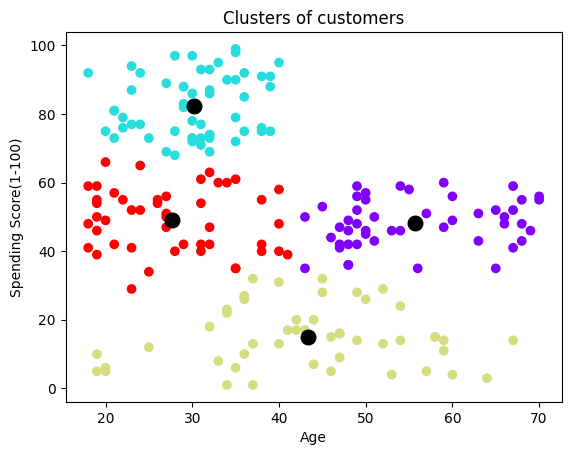

In [187]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_, cmap = "rainbow" )
plt.scatter(center[:,0],center[:,1], color = "black", s = 110)
plt.title("Clusters of customers")
plt.xlabel("Age")
plt.ylabel("Spending Score(1-100)")
plt.show()

In [188]:
#Adding labels to the cluster each data point belongs to help in visualizing in 3d setup
df["clusters"] = labels
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


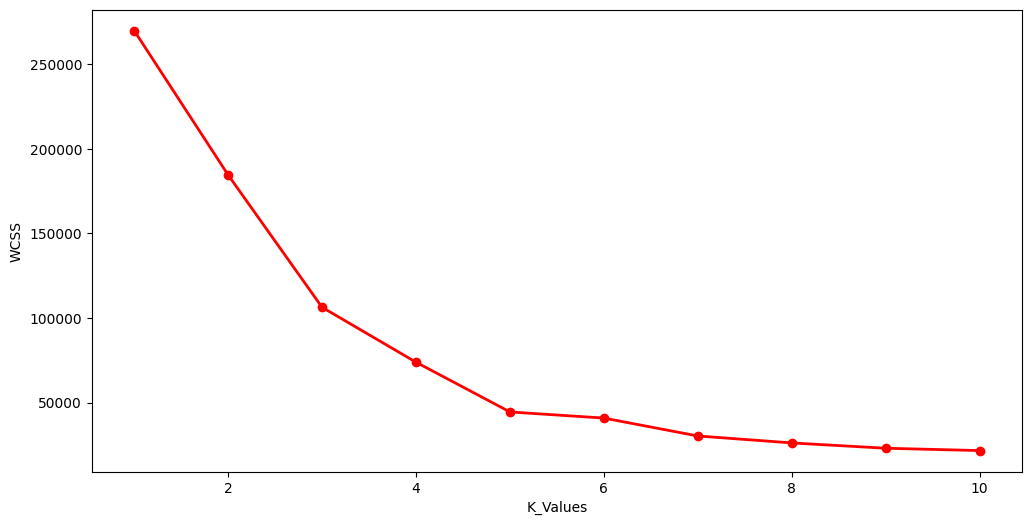

In [193]:
X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    model = kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (12,6))
plt.plot(range(1,11), wcss, color = "red", marker = "o", linewidth = 2)
plt.xlabel("K_Values")
plt.ylabel("WCSS")
plt.show()    

In [197]:
kmeans = KMeans(n_clusters = 5, init = "k-means++")
labels = kmeans.fit_predict(X2)
print(labels)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [199]:
center = kmeans.cluster_centers_
center

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

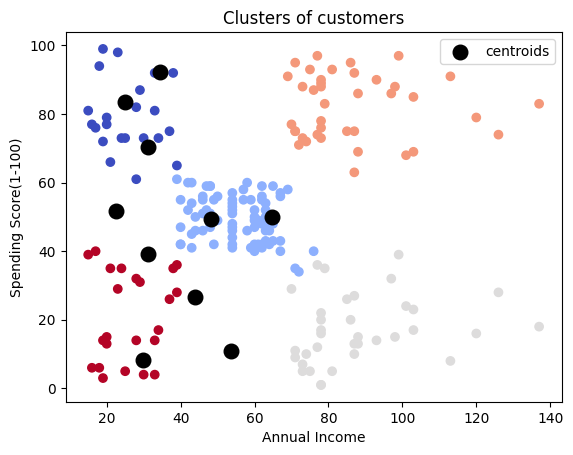

In [204]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap = "coolwarm")
plt.scatter(centers[:,0], centers[:,1], color = "black", s=110, label = "centroids")
plt.legend()
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.show()

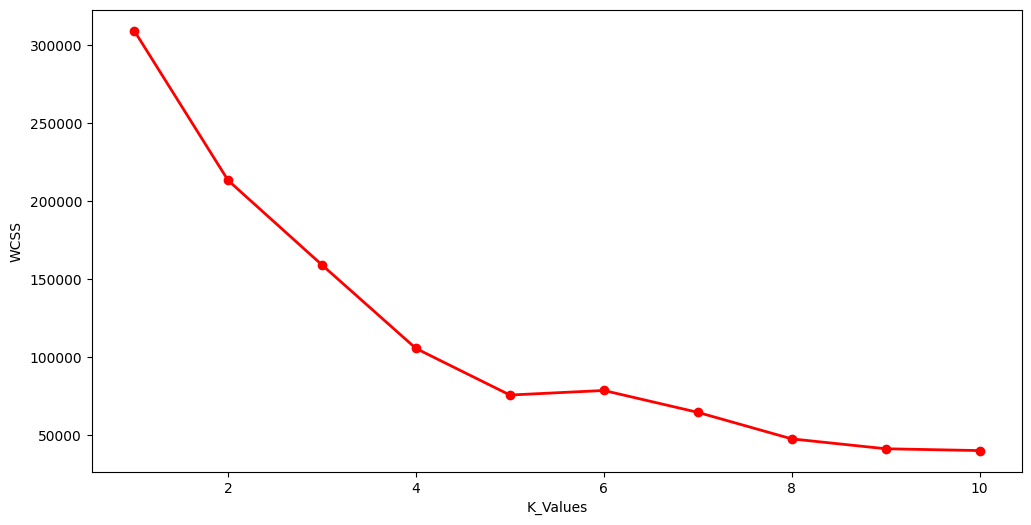

In [211]:
X3 = df.iloc[:,1:]
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    model = kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (12,6))
plt.plot(range(1,11), wcss, color = "red", marker = "o", linewidth = 2)
plt.xlabel("K_Values")
plt.ylabel("WCSS")
plt.show()    

In [231]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
labels = kmeans.fit_predict(X3)
centers = kmeans.cluster_centers_

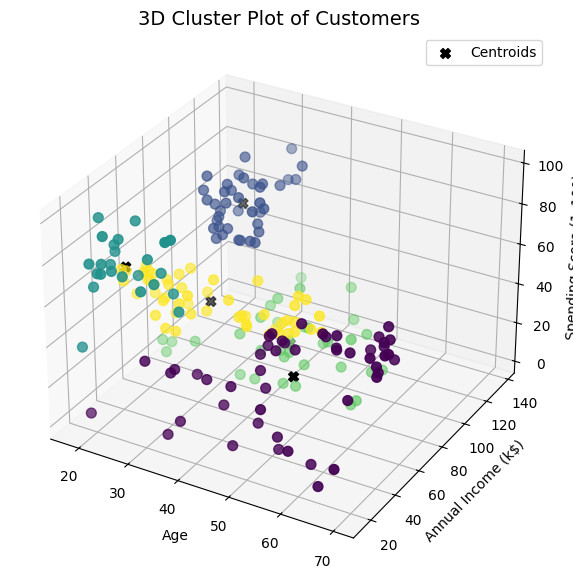

In [232]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# 3D Scatter Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')   #figure and axes

# labels
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=labels, cmap='viridis', s=50)

# Centroids
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],c='black', s=50, marker='X', label='Centroids')


ax.set_title("3D Cluster Plot of Customers", fontsize=14)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1–100)")
ax.legend()

plt.show()
